In [1]:
import math
import scipy as sp
import numpy as np
import sympy as sym
from sympy.simplify.fu import *
import matplotlib.pyplot as plt
from sympy.solvers.solveset import linsolve

### Question 1

**Find the approximate change in the value of $1/x^2$ when x changes from 2 to 100**

Theoritical solution

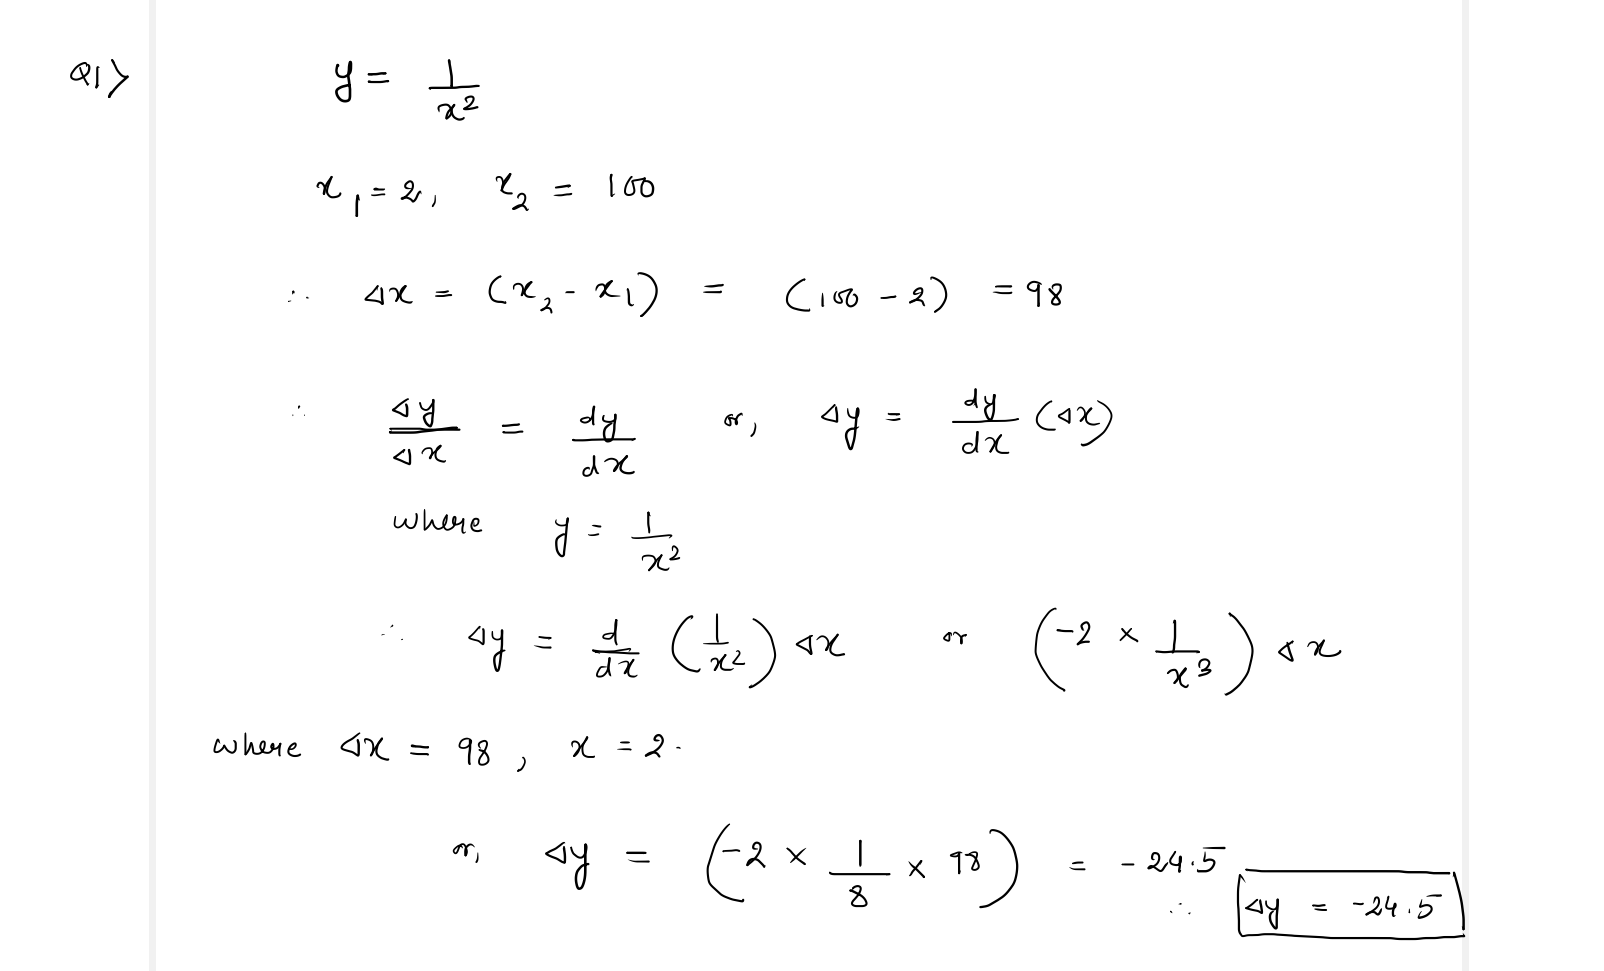

In [2]:
def calculate_change_in_y(expression, lower_limit, upper_limit, print_steps = False) -> float:
    """
    args:
    ----
    
    expression: The scipy expression, NOTE: expression must be simple with just x as variable
    lower_limit : the lower limit
    upper limit : the upper limit
    print_steps : prints the steps of finding the solution
    """
    x = sym.symbols('x')
    
    DEL_x = (upper_limit - lower_limit)
    derivative_expression = sym.Derivative(expression, x)
    derivative = derivative_expression.doit()
    answer = derivative.subs(x, 2) * DEL_x
    
    if print_steps:
        sym.init_printing()
        print(f'Given expression is:')
        sym.pprint(expression)

        print(f'Derivative of the expression w,r,t x =')
        sym.pprint(derivative_expression)
        print('which is equal to =')
        sym.pprint(derivative)
        
        print(f'Substituting the value of x and solving we get:')
        sym.pprint(answer)
        
    return float(answer)

In [3]:
lower_limit = 2
upper_limit = 100

x = sym.symbols('x')
y = 1 / x ** 2

answer = calculate_change_in_y(y, lower_limit, upper_limit, print_steps=False)
print(f'The answer of is: {answer}')

The answer of is: -24.5


### Question 2

**Rishi has a total of $590$ as currency notes in the denominations of $50$, $20$ and $10$. The ratio of the number of $50$ notes and $20$ notes is $3:5$. If she has a total of 25 notes, how many notes of each denomination she has?**

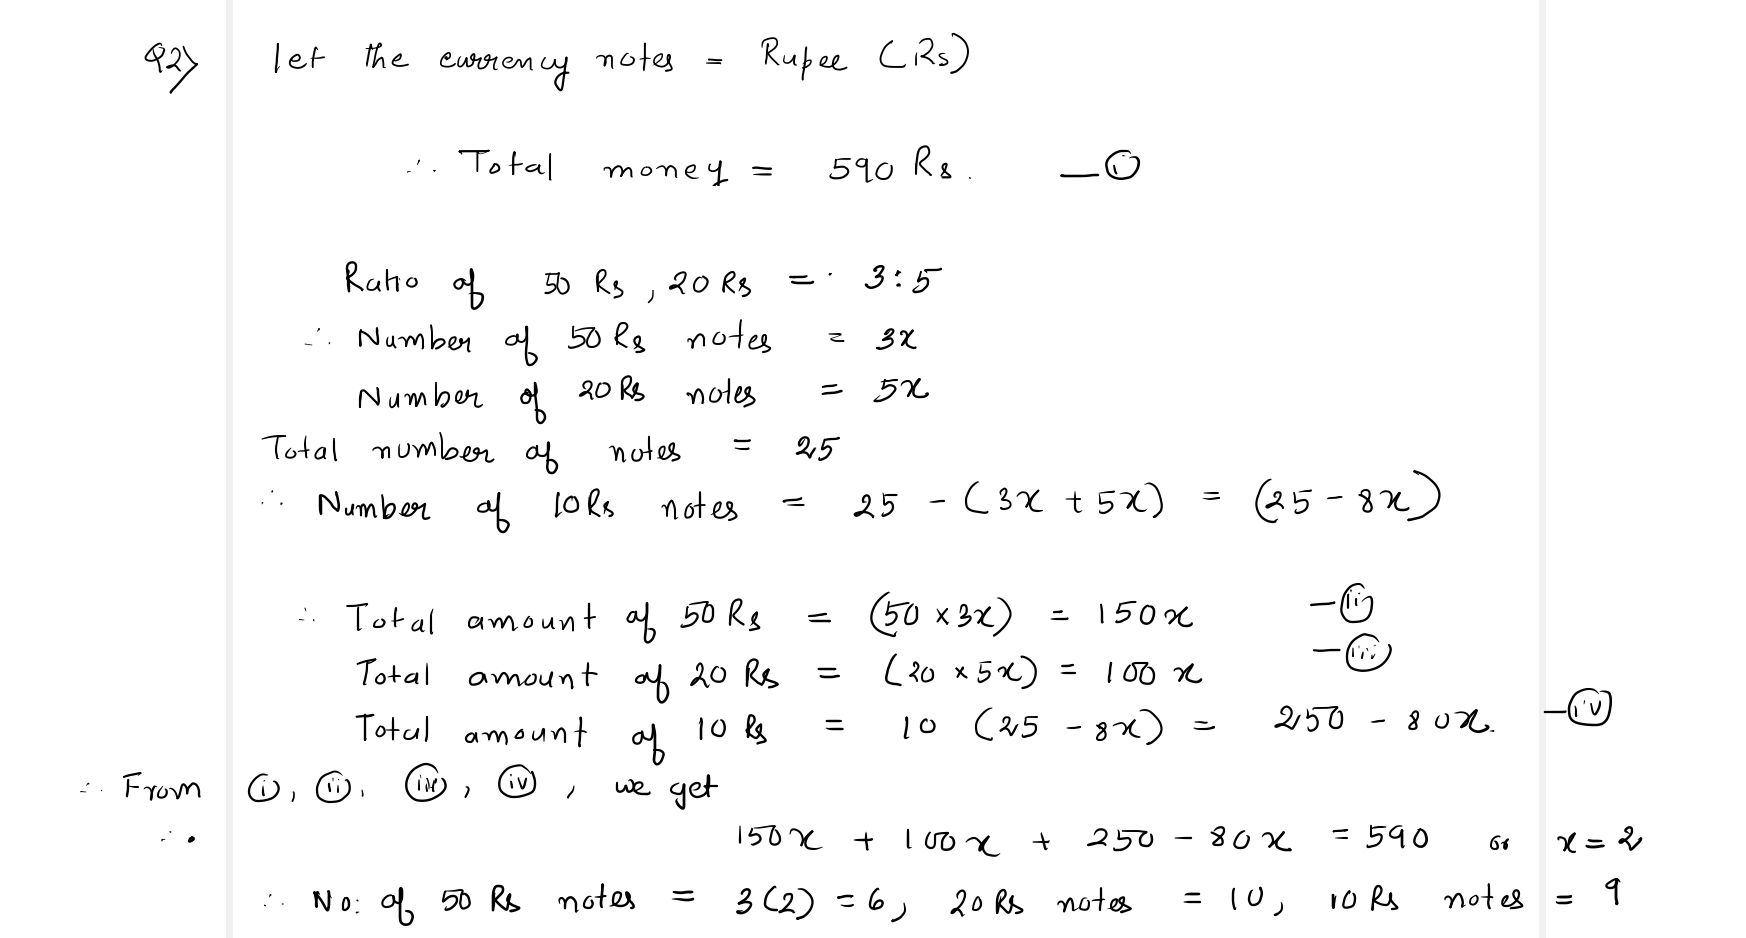

In [4]:
def solve_the_number_of_currency_problem(denominations : dict,
                                         ratio : tuple,
                                         total_number_of_notes : int,
                                         total_money_value : int) -> dict:
    
    """
    params
    ------
    denominations : dict, the keys will be rupee name, and the values will be the corresponding numerical value
    ratio : tuple, the ratio in which its divided
    total_number_of_notes : int, the total number of notes used.
    total_money_value : int, the total money value generated.
    """
    
    notes_names = list(denominations.keys())
    notes_values = list(denominations.values())
    ratio_numerator, ratio_denominator = ratio
    
    x = sym.Symbol('x')
    
    first_note = ratio_numerator * x
    second_note = ratio_denominator * x
    third_note = total_number_of_notes - (first_note + second_note)
    
    notes = [first_note, second_note, third_note]
    initial_expression = sum([num * expr for num, expr in zip(notes_values, notes)])
    equality_expression = sym.Eq(initial_expression, total_money_value)
    answer = int(sym.solve(equality_expression)[0])
    number_of_each_notes = [note.subs(x, answer) for note in notes]
    
    return dict(zip(notes_names, number_of_each_notes))

In [5]:
denominations = {
    '50_rupee' : 50,
    '20_rupee' : 20,
    '10_rupee' : 10
}

ratio = (3, 5)
total_number_of_notes = 25
total_money_value = 590

answer = solve_the_number_of_currency_problem(denominations, ratio, total_number_of_notes, total_money_value)
print(f"The number of each notes are: {answer}")

The number of each notes are: {'50_rupee': 6, '20_rupee': 10, '10_rupee': 9}


### Question 3

**The organizers of an essay competition decide that a winner in the competition gets a
prize of $100$ and a participant who does not win gets a prize of $25$. The total prize
money distributed is $3,000$. Find the number of winners, if the total number of
participants is $63$.**

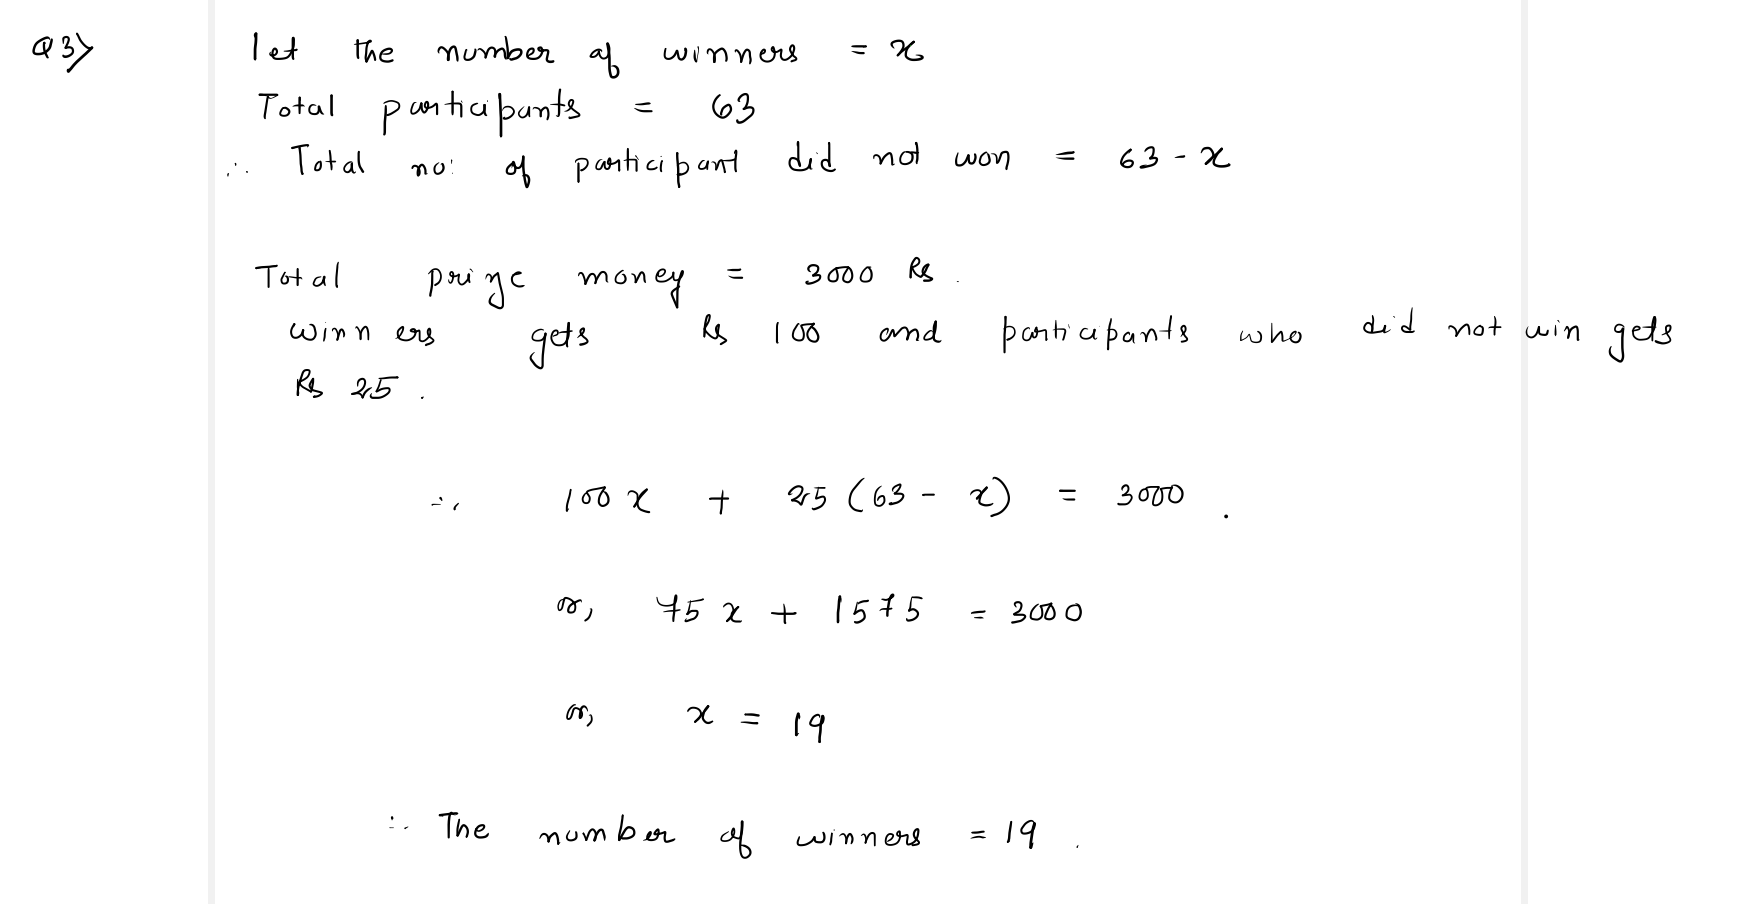

In [6]:
def find_the_total_number_of_winners(total_participants : int, 
                                     wining_prize : int,
                                     not_wining_prize : int,
                                     total_prize_money : int) -> int:
    """
    params:
    ------
    total_participants : int, The total nunber of participants who participated at the competition.
    wining_prize : int, the prize the winners were supposed to get.
    not_wining_prize : int, the money that the person would get who did not win.
    total_prize_money : int, the total prize money kept for the competition
    """
    
    number_of_winners = sym.Symbol('x')
    number_of_person_loose = (total_participants - number_of_winners)
    inital_expression = (wining_prize * number_of_winners) + (not_wining_prize * number_of_person_loose)
    resulting_equation = sym.Eq(inital_expression, total_prize_money)
    number_of_person_won = int(sym.solve(resulting_equation)[0])
    return number_of_person_won

In [7]:
total_participants = 63
wining_prize = 100
not_wining_prize = 25
total_prize_money = 3000

person_won = find_the_total_number_of_winners(total_participants, wining_prize, not_wining_prize, total_prize_money)
print(f'The total number of person won the competition is: {person_won}')

The total number of person won the competition is: 19


### Question 4 

**The sum of three consecutive multiples of $11$ is $363$. Find these multiples**

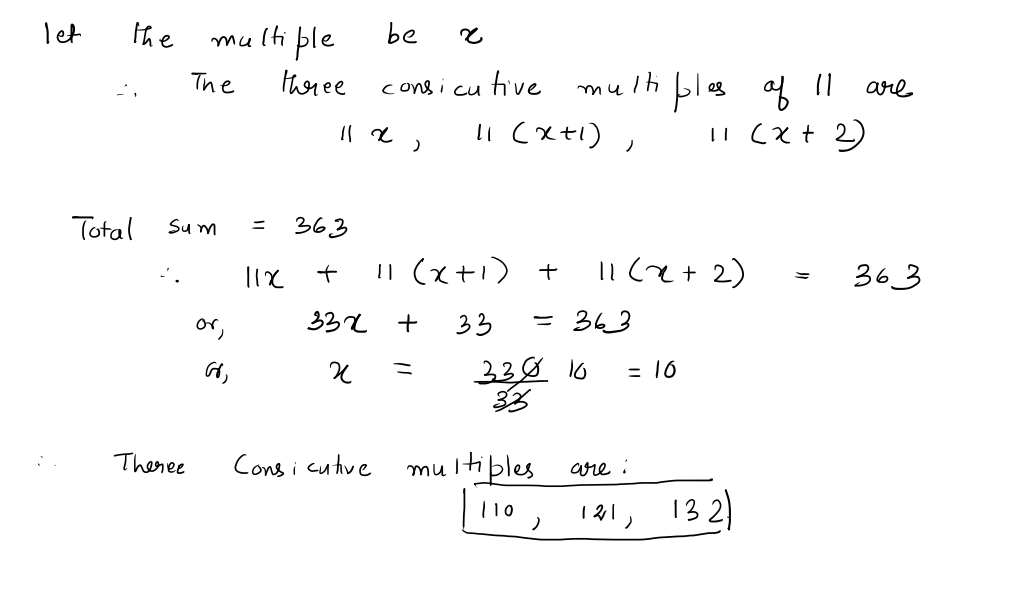

In [8]:
def find_three_consicutive_multiples(multiples_of : int, 
                                     total_sum : int) -> list:
    """
    multiples_of : int, the multiples of the number we require (e.g. multiples of 11)
    total_sum : int, the total sums of the three consicutive multiples.
    """
    
    multiple = sym.Symbol('x')
    three_consicutive_multiples = [multiples_of * multiple,
                                   multiples_of * (multiple + 1),
                                   multiples_of * (multiple + 2)]
    
    sum_of_multiples = sum(three_consicutive_multiples)
    required_equation = sym.Eq(sum_of_multiples, total_sum)
    answer = sym.solve(required_equation)[0]
    return [consi_multiple.subs(x, answer) for consi_multiple in three_consicutive_multiples]

In [9]:
multiples_of = 11
total_sum = 363

consicutive_multiples = find_three_consicutive_multiples(multiples_of, total_sum)
print(f'Thus the three consicutive multiples of are: {consicutive_multiples}')

Thus the three consicutive multiples of are: [110, 121, 132]


### Question 5

**The digits of a two-digit number differ by $3$. If the digits are interchanged,
and the resulting number is added to the original number, we get $143$. What can be the
original number?**

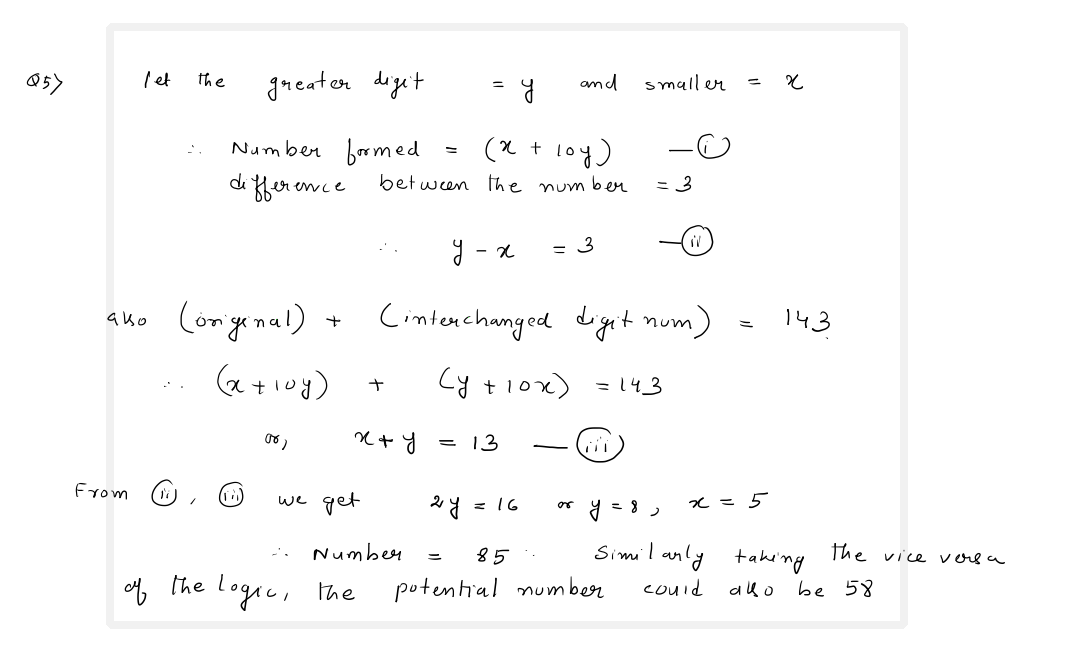

In [10]:
def find_number_from_two_digits(difference_between_digits : int,
                                original_plus_interchanged_num : int) -> tuple:
    """
    params:
    ------
    difference_between_digits : int, the difference between the two digits of the number
    original_plus_interchanged_num : int, the resulting number when interchanged is added to the original number
    """
    
    """
    returns:
    -------
    tuple : as in this case there could be two possible formation of numbers
    """
    
    digit_x, digit_y = sym.Symbol('x'), sym.Symbol('y')
    
    equation_1 = digit_y - digit_x - difference_between_digits
    equation_2 = (10 * digit_x + digit_y) + (digit_x + 10 * digit_y) - original_plus_interchanged_num
    answers = sym.solve((equation_1, equation_2), digit_x, digit_y)
    return (
        sum([multiplier * ans for multiplier, ans in zip([10, 1], list(answers.values()))]),
        sum([multiplier * ans for multiplier, ans in zip([1, 10], list(answers.values()))])
    )

In [11]:
difference_between_digits = 3
original_plus_interchanged_num = 143

answer = find_number_from_two_digits(difference_between_digits, original_plus_interchanged_num)
print(f'The resultant numbers are either: {answer[0]} or {answer[1]}')

The resultant numbers are either: 58 or 85


### Question 6

**Solve**

$$5x-2 (2x-7) = 2(3x-1) + 7/2$$

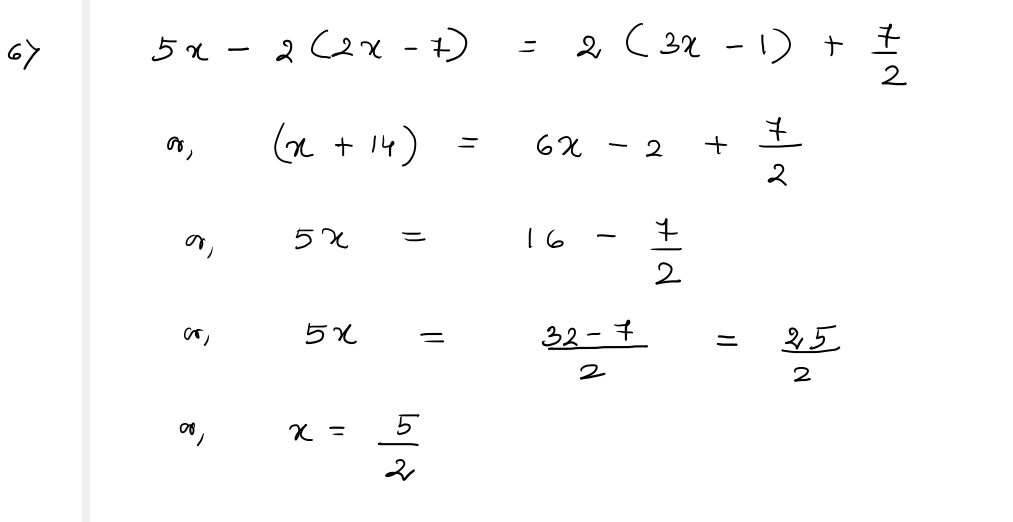

In [12]:
def solve_simple_equation_one_variable(expression_lhs, expression_rhs):
    """
    params:
    ------
    expression_lhs : the left hand side expression of the equation.
    expression_ths : the right hand side expression of the equation.
    """
    x = sym.Symbol('x')
    required_equation = sym.Eq(expression_lhs, expression_rhs)
    return sym.solve(required_equation, x)[0]

In [13]:
x = sym.Symbol('x')

expression_lhs = 5 * x - 2 * (2* x - 7)
expression_rhs = 2 * (3 * x - 1) + 7/2

print(f'The value of x is: {solve_simple_equation_one_variable(expression_lhs, expression_rhs)}')

The value of x is: 2.50000000000000


### Question 7

**Find the area of the region included between the parabola $y2 = x$ and the line $x + y = 2$
and the X-axis.**

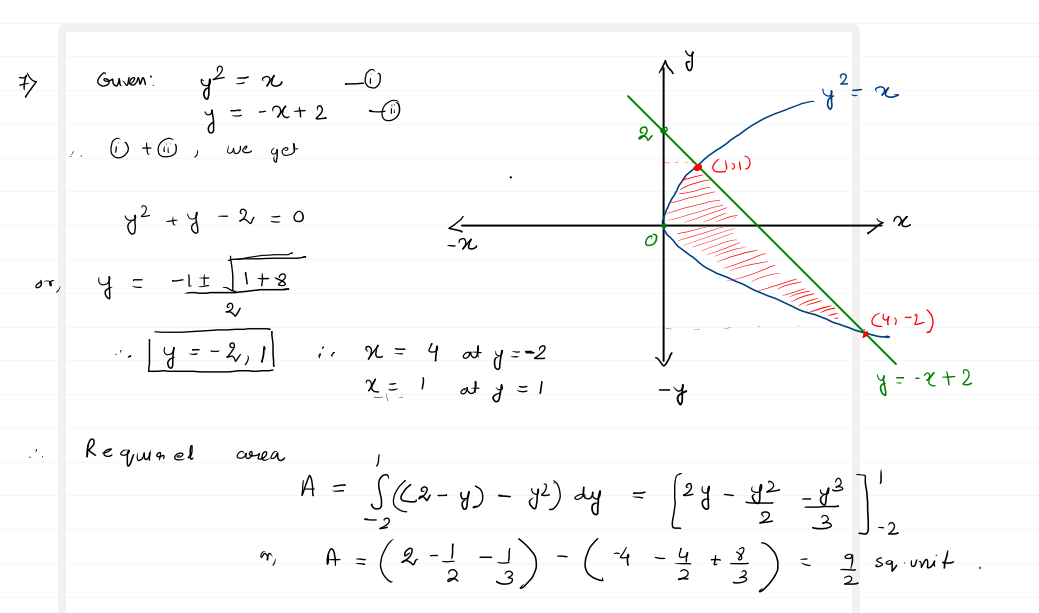

In [14]:
def find_area_under_intersection_of_two_curves(curve1, curve2) -> float:
    """
    params:
    ------
    
    curve1 : the equation of the first curve
    curve2 : the equation of the second curve
    """
    x = sym.Symbol('x')
    y = sym.Symbol('y')
    
    solutions = sym.solve((curve1, curve2), y, x)
    y_solutions = sorted([solutions[0][0], solutions[1][0]])
    
    lower_limit = y_solutions[0]
    upper_limit = y_solutions[1]
    
    curve_expression1 = sym.solve(curve1, x)[0]
    curve_expression2 = sym.solve(curve2, x)[0]
    curve_intersection = curve_expression2 - curve_expression1
    
    area_expression = sym.integrate(curve_intersection)
    area_answer = area_expression.subs(y, upper_limit) - area_expression.subs(y, lower_limit)
    
    return abs(area_answer)

In [15]:
x = sym.Symbol('x')
y = sym.Symbol('y')

curve1 = sym.Eq(y**2, x)
curve2 = sym.Eq(y, -x+2)

In [16]:
area = find_area_under_intersection_of_two_curves(curve1, curve2)
print(f'The area under the intersection of the two curves is: {area} which is = {float(area)}')

The area under the intersection of the two curves is: 9/2 which is = 4.5


### Question 8

**A manufacturer produces three models of toys in the form of bikes say $X$,$Y$ and $Z$
.Model $X$ takes as $10$ man-hour to make per unit, Model $Y$ takes $5$ man-hour per unit
and model $Z$ takes $4$ man-hour per unit. There are a total $212$ man-hour available
per
week. Handling and marketing costs are $20$, $30$ and $40$ per unit for models $X$,$Y$
and $Z$ respectively. The total funds available for these purposes are $920$ per week.
Profits
per unit for models $X$,$Y$ and $Z$ are $40$, $10$ and $70$ respectively, but at the end of the
week, company get a profit of $810$. Solve the system of equations by matrix
method**

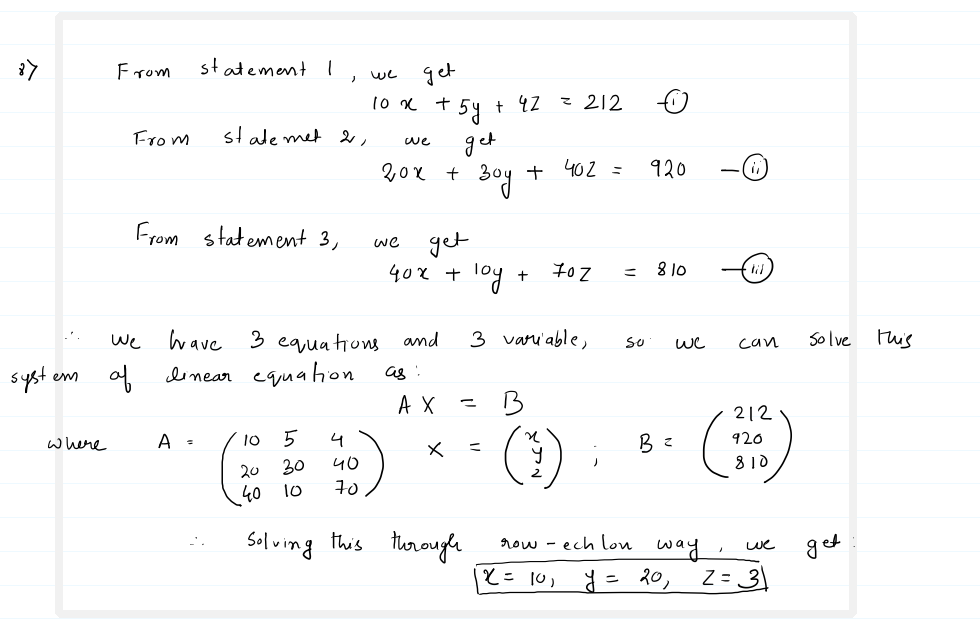

In [17]:
def solve_matrix_method(equations : list) -> np.array:
    """
    params:
    ------
    equations : list, A list of required equations to solve.
    Using AX = B format to solve the equations
    """
    eq1 = sym.Poly(equations[0]).coeffs()
    eq2 = sym.Poly(equations[1]).coeffs()
    eq3 = sym.Poly(equations[2]).coeffs()
    
    A = np.array([eq1[:-1], eq2[:-1], eq3[:-1]], dtype=np.int32)
    B = np.array([abs(eq1[-1]), abs(eq2[-1]), abs(eq3[-1])], dtype=np.int32)
    return np.dot(np.linalg.inv(A), B)

In [18]:
def solve_equation_method(equations : list) -> dict: 
    """
    params:
    ------
    equations : a list that will contain the set of the equations 
    """
    x, y, z = sym.symbols('x, y, z')
    solutions = list(linsolve(equations, (x, y, z)))[0]
    return {
        'x' : solutions[0],
        'y' : solutions[1],
        'z' : solutions[2]
    }

In [19]:
x, y, z = sym.symbols('x, y, z')

equations = [
    10 * x + 5 * y + 4*z - 212,
    20 * x + 30 * y + 40*z - 920,
    40 * x + 10 * y + 70*z - 810
]

using MATRIX method

In [20]:
solutions = solve_matrix_method(equations)
print(f"From matrix method, we get values of x, y, z as: {solutions}")

From matrix method, we get values of x, y, z as: [10. 20.  3.]


using simple EQUATION based method

In [21]:
solutions = solve_equation_method(equations)
print(f"So the value of x is {solutions['x']}, value of y is {solutions['y']} and value of z is {solutions['z']}")

So the value of x is 10, value of y is 20 and value of z is 3


### Question 9

**Proof that:**

$${tan}^{-1}(\frac{cos x}{1 - sinx}) = (\frac{\pi}{4} + \frac{x}{2}), x \in (\frac{-\pi}{2}, \frac{\pi}{2})$$

**Approach 1**: Coding the proof step by step using sympy

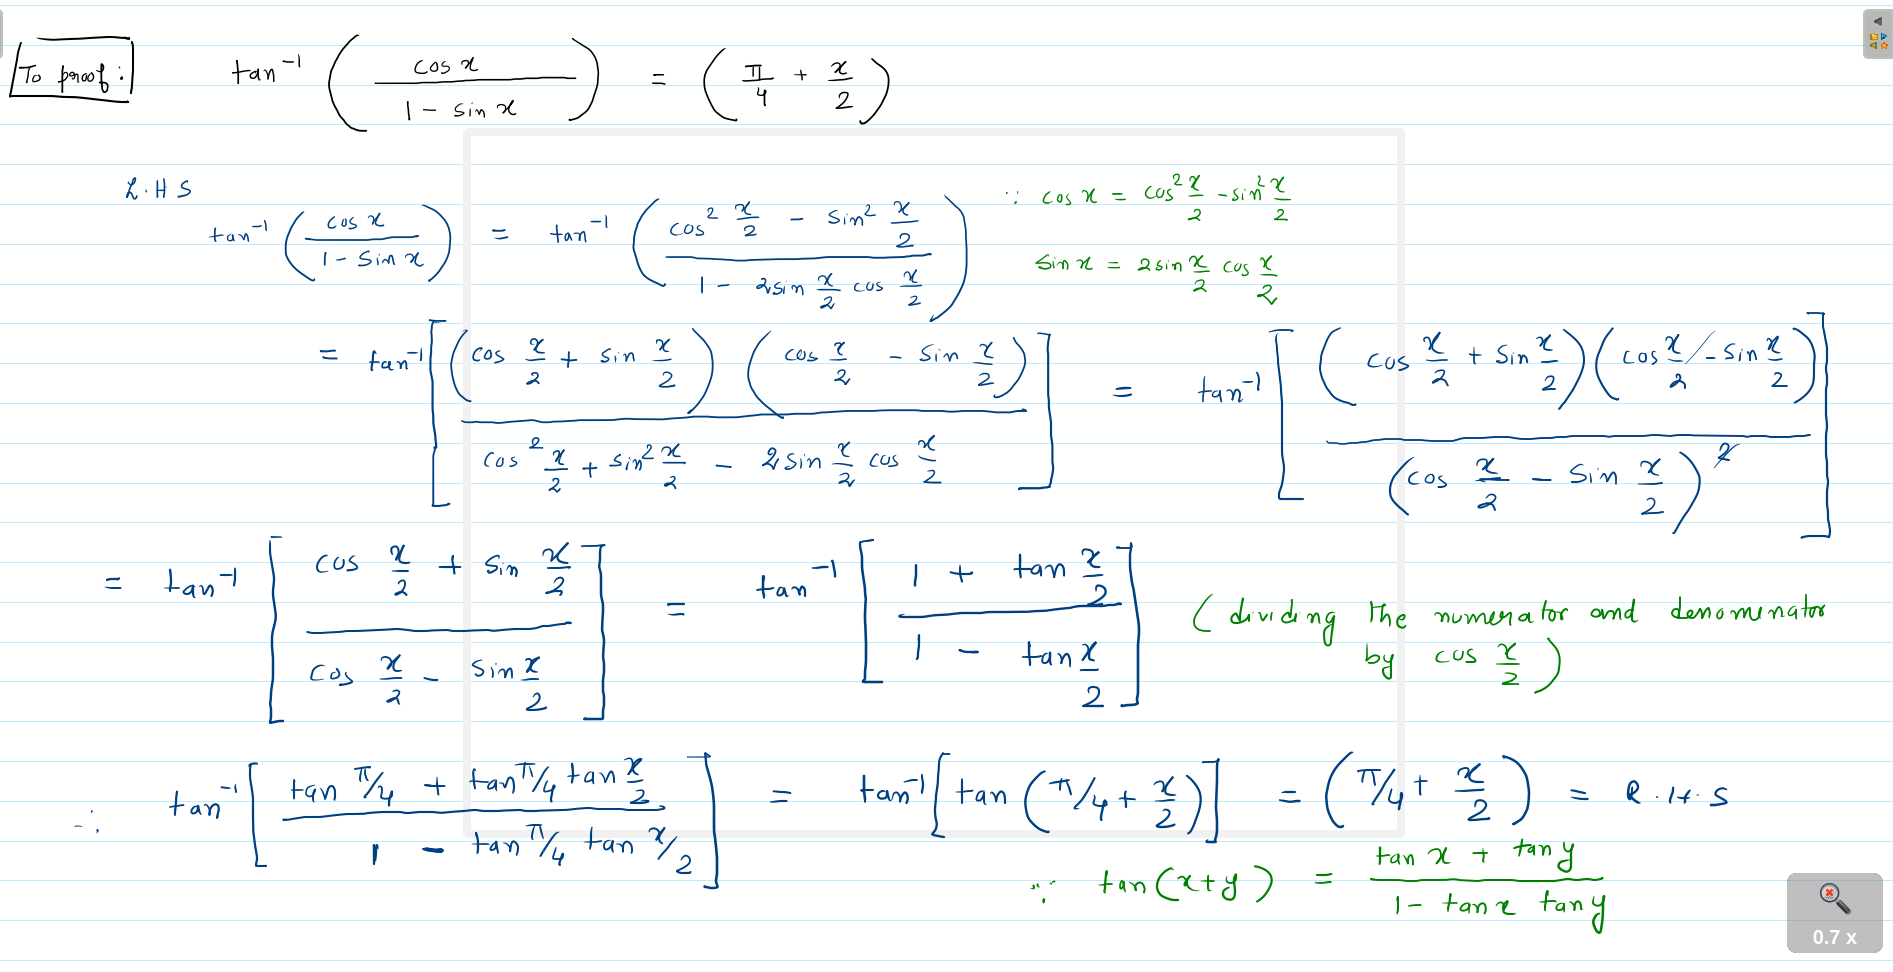

We can rewrite the LHS, where we put our $tan()$ to other side

In [22]:
x = sym.Symbol('x')

LHS = sym.cos(x)/(1 - sym.sin(x))
LHS

cos(x)/(1 - sin(x))

So our RHS becomes

In [23]:
RHS = sym.tan(sym.pi/4 + x/2)
RHS

tan(x/2 + pi/4)

so we have to proof:

In [24]:
sym.Eq(LHS, RHS)

Eq(cos(x)/(1 - sin(x)), tan(x/2 + pi/4))

So we can define our numerator and denominator as follows:

In [25]:
numerator = sym.cos(x)
denominator = (1 - sym.sin(x))

cosx = sym.cos(x/2) ** 2 - sym.sin(x/2) ** 2
sinx = 2 * sym.sin(x/2) * sym.cos(x/2)
identity = sym.sin(x/2) ** 2 + sym.cos(x/2) ** 2

After expanding based on formula, we can express our numerator as:

$$cos(x) = cos^2(\frac{x}{2}) - sin^2(\frac{x}{2})$$

and we can write $sin(x)$ as: 
$$sin(x) = 2 sin(\frac{x}{2}) cos(\frac{x}{2})$$

and we can write $1$ as:

$$sin^2(\frac{x}{2}) + cos^2(\frac{x}{2}) = 1$$

And so now we can show our LHS as:

In [26]:
numerator = cosx
denominator = identity - sinx

frac = numerator / denominator
LHS = frac
LHS

(-sin(x/2)**2 + cos(x/2)**2)/(sin(x/2)**2 - 2*sin(x/2)*cos(x/2) + cos(x/2)**2)

As, 
$$cos^2(\frac{x}{2}) - sin^2(\frac{x}{2}) = (cos(\frac{x}{2}) - sin(\frac{x}{2}))  ((cos(\frac{x}{2}) + sin(\frac{x}{2}))$$


Also we can write $sin^2(\frac{x}{2}) - 2sin(\frac{x}{2})cos(\frac{x}{2}) + cos^2(\frac{x}{2})$ as 

$$(sin(\frac{x}{2}) - cos(\frac{x}{2}))^2$$

Therefore Further simplifying the numerator and the denominator we get

In [27]:
numerator = (sym.cos(x/2) - sym.sin(x/2)) * (sym.cos(x/2) + sym.sin(x/2))
denominator = (sym.sin(x/2) - sym.cos(x/2)) ** 2

LHS = numerator / denominator
LHS

(-sin(x/2) + cos(x/2))*(sin(x/2) + cos(x/2))/(sin(x/2) - cos(x/2))**2

We can directly convert the above LHS as the sum of products to function of sum, as follows

In [28]:
LHS = TR10i(LHS)
LHS

sin(x/2 + pi/4)/cos(x/2 + pi/4)

Finally converting this $\frac{sin(x)}{cos(x)}$ as $tan(x)$ we get

In [29]:
LHS = TR2i(LHS)
LHS

tan(x/2 + pi/4)

Which is our RHS, as we can proof this by:

In [30]:
print(LHS == RHS, ",Hence proved!")

True ,Hence proved!


**Approach 2:** Showing the proof in graphical way. For the given range of values of x, the curves must coincide with each other

In [31]:
x = np.arange(-np.pi/2, np.pi/2, 0.1)

In [32]:
y1 = np.arctan(np.cos(x) / (1 - np.sin(x)))
y2 = np.pi/4 + x/2

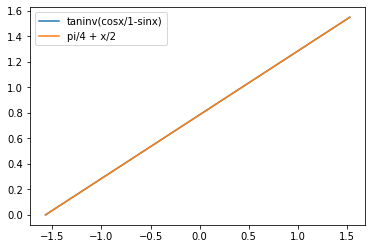

In [33]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["taninv(cosx/1-sinx)", "pi/4 + x/2"])
plt.show()

From the graph we can see that, the cruves co-incide with each other for the given range and from here also we can proof that they are equal.